In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
X = np.load("data/X_scaled.npy")
y = np.load("data/y.npy")

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)


Feature shape: (547557, 82)
Labels shape: (547557,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 438045
Test size: 109512


In [4]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [5]:
y_pred = clf.predict(X_test)


Accuracy: 0.9998

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     57709
      ATTACK       1.00      1.00      1.00     51803

    accuracy                           1.00    109512
   macro avg       1.00      1.00      1.00    109512
weighted avg       1.00      1.00      1.00    109512



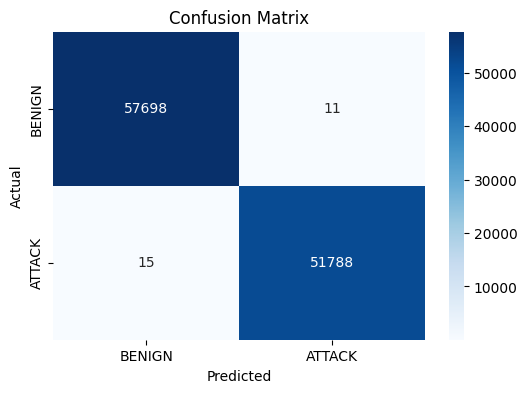

In [6]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["BENIGN", "ATTACK"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["BENIGN", "ATTACK"], yticklabels=["BENIGN", "ATTACK"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [7]:
joblib.dump(clf, "models/classifier.pkl")
print("Model saved to models/classifier.pkl")


Model saved to models/classifier.pkl


NameError: name 'df' is not defined

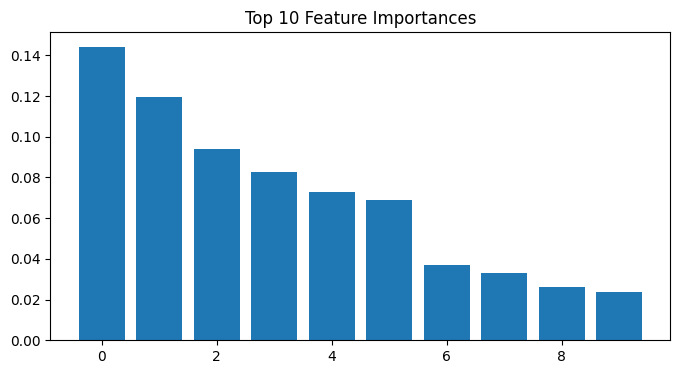

In [8]:
importances = clf.feature_importances_
indices = np.argsort(importances)[-10:][::-1]

plt.figure(figsize=(8,4))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices], align="center")
plt.xticks(range(10), [df.drop(columns_to_drop + ["Label"], axis=1).columns[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()
